

![FIBE](https://logos-world.net/wp-content/uploads/2021/08/FBI-Logo.png)

   # FIBE CRIME DATA ANALYSIS #


## Objective of the project :
 To analyze the data of crime so that FIBE team can take action to prevent it .

---







## Obtaining Data


## Load the data from "Train.xlsx" into a pandas DataFrame.


python script to obtain data from "Train.xlsx" into a pandas DataFrame using `pd.read_excel()`.



In [ ]:
import pandas as pd

df = pd.read_excel('Train.xlsx')
print(df.shape)
display(df.head())

(474565, 13)


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


**OSMEN (Scrum stage)**: Cleaning the data: by handling missing values, outliers, and inconsistencies.


**Reasoning**:
Missing Values should be removed as Crime Data should not be filled with mean or median values.



In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove rows with missing values
df_cleaned = df.dropna()
print("\nShape after removing rows with missing values:", df_cleaned.shape)

Missing Values:
 TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Shape after removing rows with missing values: (423061, 13)


**Viewing Outliers**:
Checking potential outliers in numerical columns using box plots and IQR.



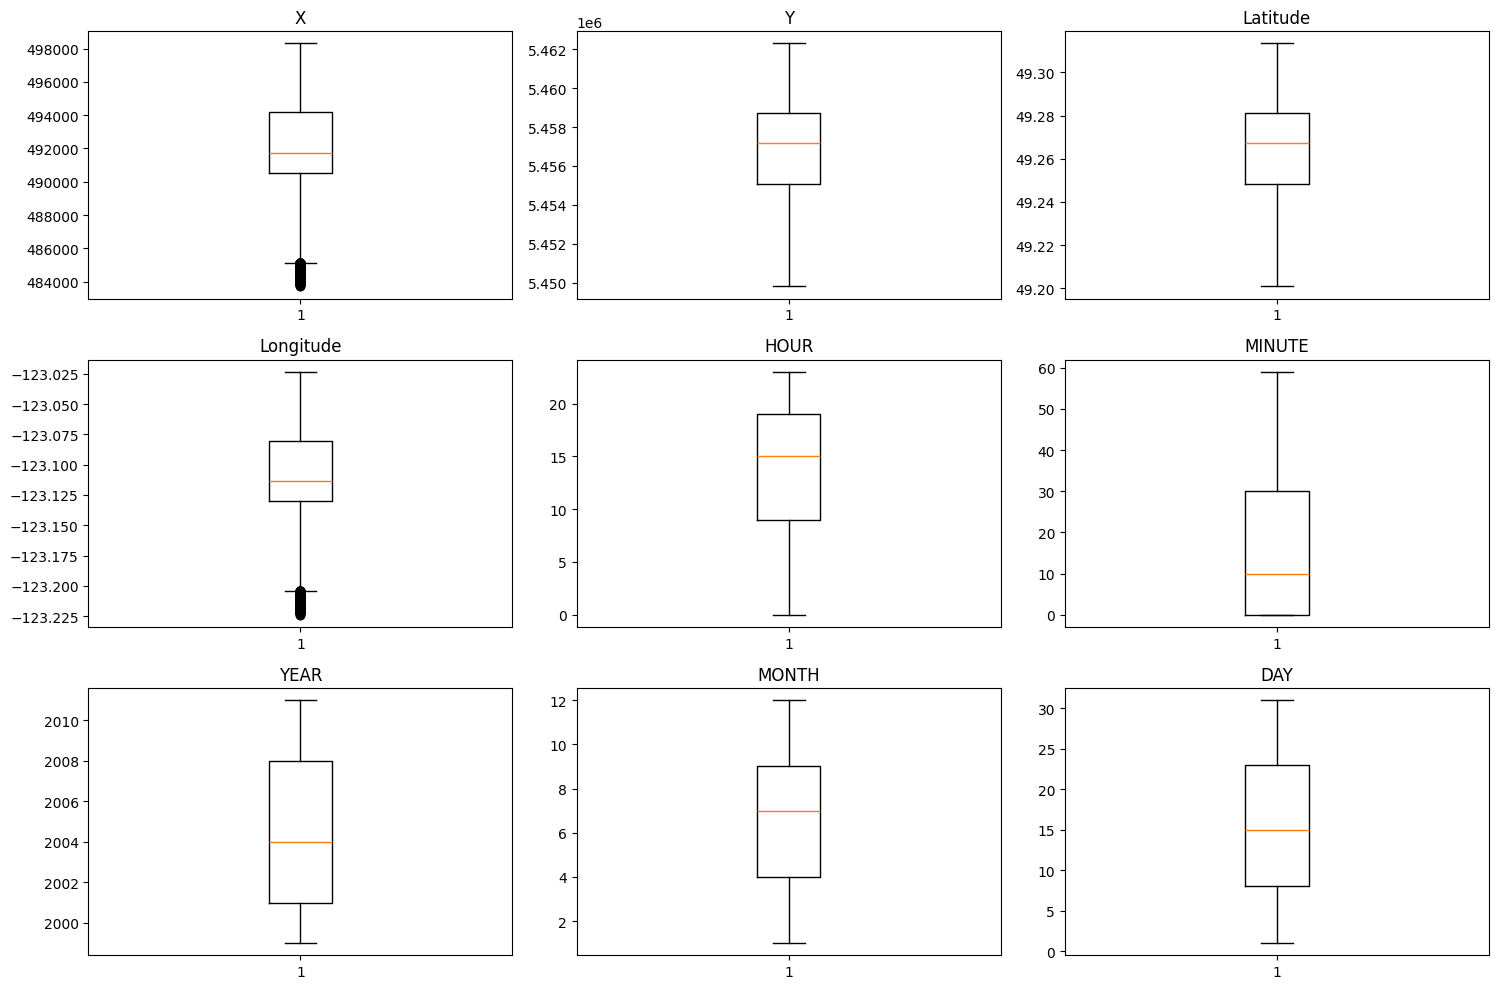

Outliers in X: 2286
Outliers in Y: 0
Outliers in Latitude: 0
Outliers in Longitude: 2260
Outliers in HOUR: 0
Outliers in MINUTE: 0
Outliers in YEAR: 0
Outliers in MONTH: 0
Outliers in DAY: 0


In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_cols = ['X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY']

# Create box plots for numerical columns to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  plt.boxplot(df_cleaned[col])
  plt.title(col)

plt.tight_layout()
plt.show()

# Calculate IQR for numerical columns
for col in numerical_cols:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
  print(f"Outliers in {col}: {outliers.shape[0]}")

**Adjusting Outliers : to make data consistent**:
Remove outliers based on the IQR analysis from the previous step.



In [ ]:
# Remove outliers based on IQR for 'X' and 'Longitude'
for col in ['X', 'Longitude']:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print("Shape after removing outliers:", df_cleaned.shape)

Shape after removing outliers: (420684, 13)


#**Checking Categories for consistency**:
Check for inconsistencies in categorical variables.



In [ ]:
# Check for inconsistencies in categorical variables
for col in ['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD']:
  print(f"\nUnique values in {col}:")
  print(df_cleaned[col].unique())

# Check for inconsistent date formats
# ... (If there are date columns, check their formats and ensure consistency)



Unique values in TYPE:
['Other Theft' 'Break and Enter Residential/Other' 'Mischief'
 'Break and Enter Commercial' 'Theft from Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Injury)' 'Theft of Vehicle'
 'Theft of Bicycle']

Unique values in HUNDRED_BLOCK:
['9XX TERMINAL AVE' '63XX WILTSHIRE ST' '40XX W 19TH AVE' ...
 'X BOUNDARY RD OFRP' 'X E 1ST AVE OFRP' 'X RUPERT ST OFRP']

Unique values in NEIGHBOURHOOD:
['Strathcona' 'Kerrisdale' 'Dunbar-Southlands' 'Grandview-Woodland'
 'Sunset' 'West End' 'Central Business District' 'Hastings-Sunrise'
 'Victoria-Fraserview' 'Fairview' 'Kensington-Cedar Cottage'
 'West Point Grey' 'Shaughnessy' 'Renfrew-Collingwood' 'Killarney'
 'Riley Park' 'Arbutus Ridge' 'Musqueam' 'Mount Pleasant' 'Kitsilano'
 'Stanley Park' 'South Cambie' 'Marpole' 'Oakridge']


# Data exploration


## Descriptive Statistics
Calculate descriptive statistics, analyze data distribution, and investigate correlations for the cleaned DataFrame to understand its characteristics.



In [ ]:
# Descriptive statistics for numerical variables
numerical_cols = ['X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY']
print("Descriptive Statistics:\n", df_cleaned[numerical_cols].describe())

# Analyze distribution of key variables
print("\nValue Counts for TYPE:\n", df_cleaned['TYPE'].value_counts())
print("\nValue Counts for NEIGHBOURHOOD:\n", df_cleaned['NEIGHBOURHOOD'].value_counts())

# Correlation analysis
correlation_matrix = df_cleaned[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Data structure analysis
print("\nUnique Values for TYPE:", df_cleaned['TYPE'].nunique())
print("\nUnique Values for NEIGHBOURHOOD:", df_cleaned['NEIGHBOURHOOD'].nunique())

# Time series analysis
print("\nDate Range:", df_cleaned['Date'].min(), "-", df_cleaned['Date'].max())
print("\nNumber of unique dates:", df_cleaned['Date'].nunique())

Descriptive Statistics:
                    X             Y       Latitude      Longitude  \
count  420684.000000  4.206840e+05  420684.000000  420684.000000   
mean   492270.719184  5.456617e+06      49.262265    -123.106236   
std      2715.164007  2.515585e+03       0.022624       0.037320   
min    485177.650000  5.449797e+06      49.200897    -123.203717   
25%    490587.397500  5.455054e+06      49.248158    -123.129404   
50%    491758.440000  5.457185e+06      49.267345    -123.113317   
75%    494187.967500  5.458710e+06      49.281123    -123.079845   
max    498306.000000  5.462300e+06      49.313349    -123.023289   

                HOUR         MINUTE           YEAR          MONTH  \
count  420684.000000  420684.000000  420684.000000  420684.000000   
mean       13.729376      16.788713    2004.321683       6.559056   
std         6.784216      18.362944       3.871770       3.408363   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.000

#Data visualization
Visualize the data in `df_cleaned` to gain insights into its characteristics.


**Visualization by drawing Graphs and charts**:
Generate histograms for numerical variables to understand their distributions, scatter plots to investigate relationships between pairs of variables, and box plots to identify outliers.



**Creating Co-relation Matrix**
 A correlation matrix heatmap to visualize the relationships between all numerical variables.



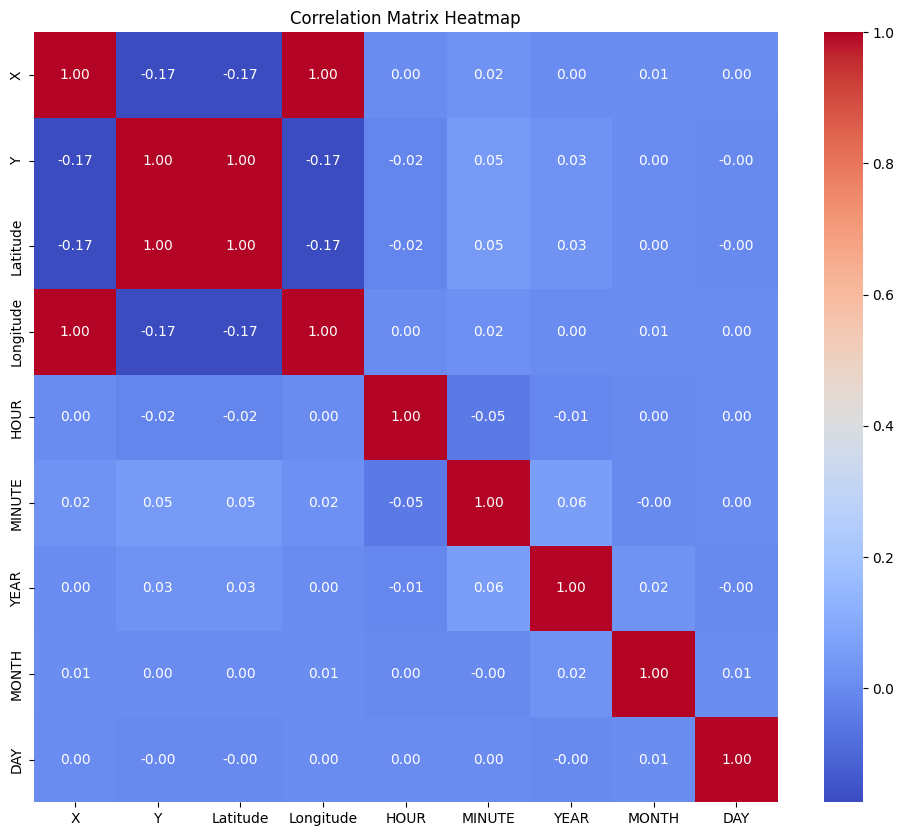

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix heatmap
correlation_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Reasoning**:
Generate visualizations for categorical variables such as 'TYPE' and 'NEIGHBOURHOOD' to understand their distribution and relationship with other variables, particularly the time series aspect.



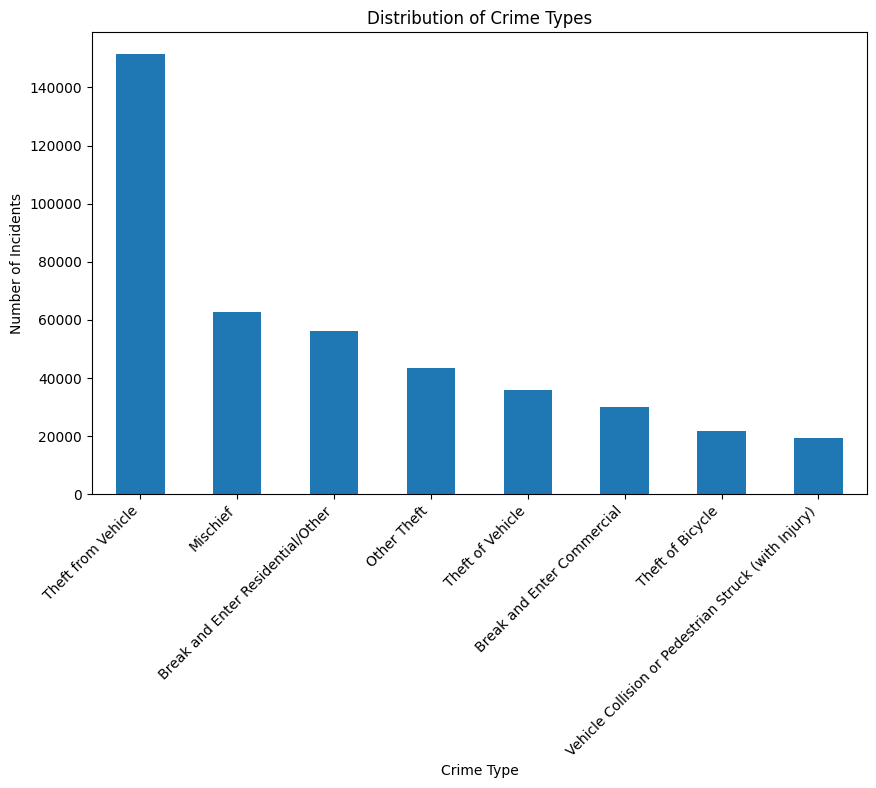

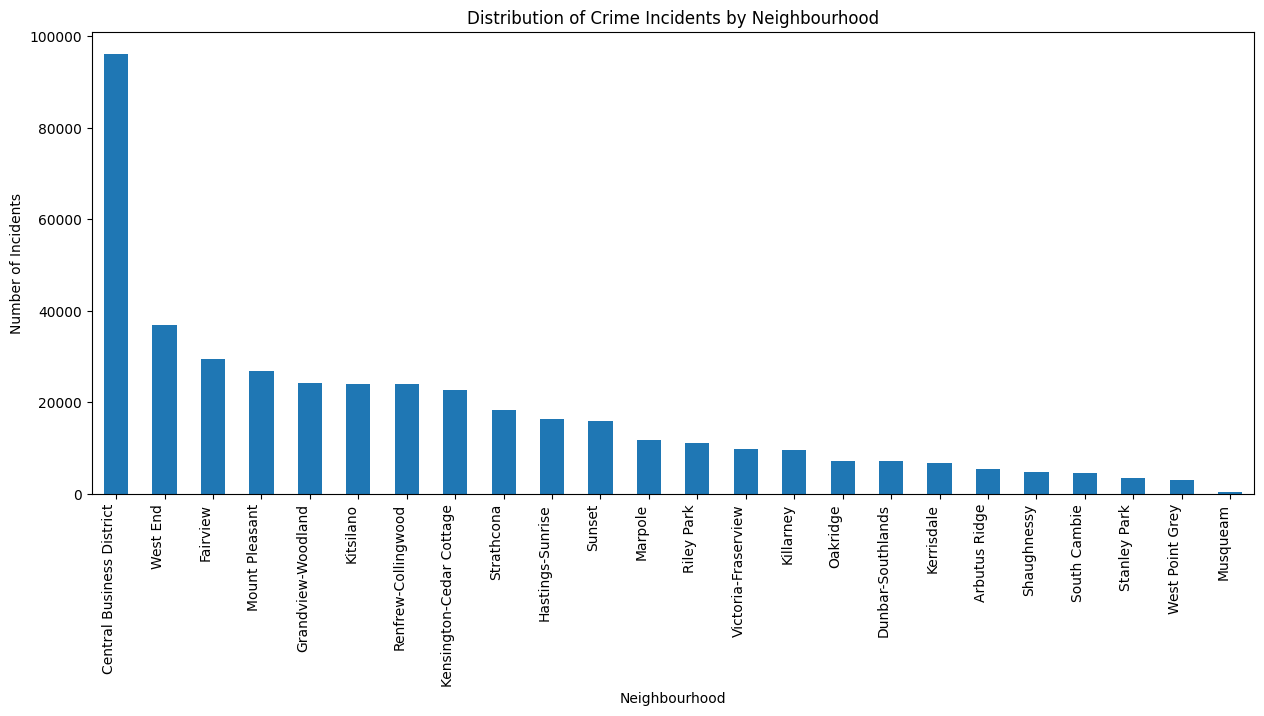

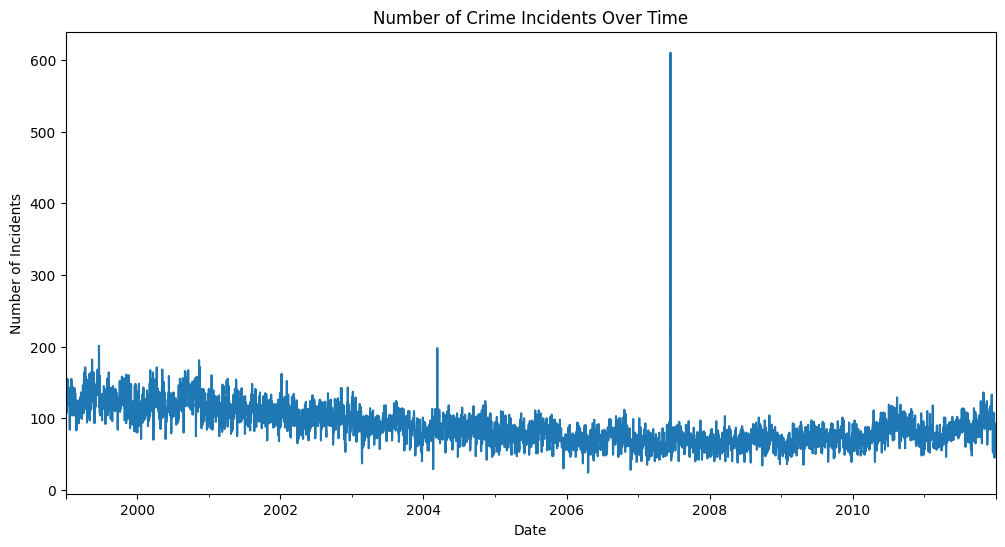

<Figure size 1200x600 with 0 Axes>

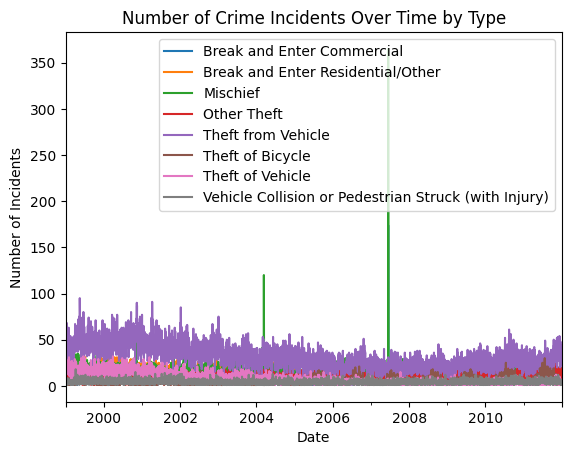

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for crime type distribution
plt.figure(figsize=(10, 6))
df_cleaned['TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar chart for neighbourhood distribution
plt.figure(figsize=(15, 6))
df_cleaned['NEIGHBOURHOOD'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Incidents by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, ha='right')
plt.show()

# Time series analysis: Number of incidents per month
plt.figure(figsize=(12, 6))
df_cleaned.groupby('Date')['TYPE'].count().plot()
plt.title('Number of Crime Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

# Time series analysis: Number of incidents per month for each crime type
plt.figure(figsize=(12, 6))
df_cleaned.groupby(['Date', 'TYPE'])['TYPE'].count().unstack().plot()
plt.title('Number of Crime Incidents Over Time by Type')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(loc='best')
plt.show()

# Data analysis:Analysing Time Series Data

Analyze the time series data in `df_cleaned` to identify trends, seasonality, and other patterns.


**Reasoning**:
Prepare the time series data by converting the 'Date' column to datetime objects, setting it as the index, and calculating the daily number of crime incidents.



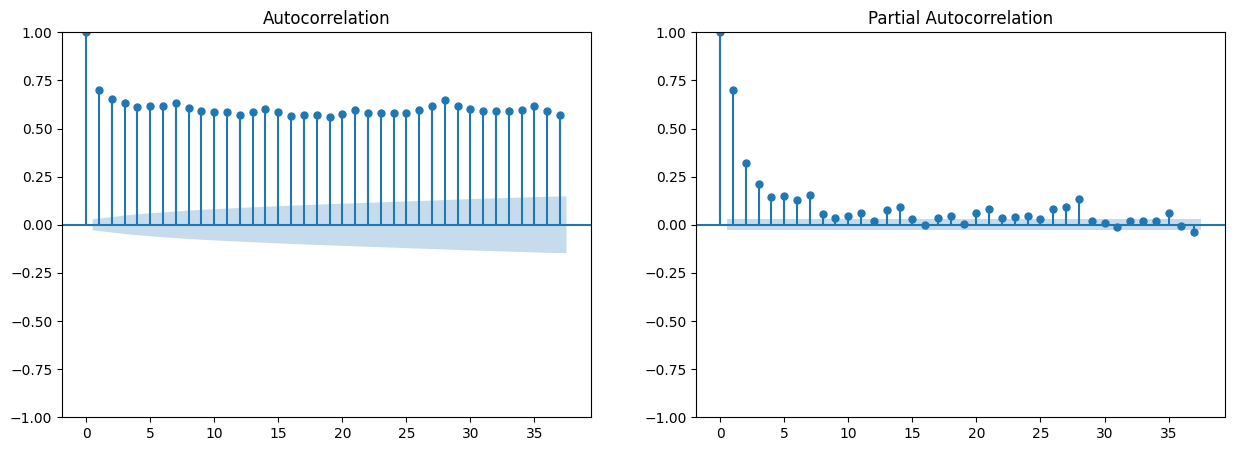

In [ ]:
# Analyze Seasonality (visual inspection of the seasonal component was done in the previous step)

# Calculate ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(daily_incidents, ax=ax1)
plot_pacf(daily_incidents, ax=ax2)
plt.show()

# Data visualization : Time Series Data,Trends and Patterns
Visualize the time series data, including trends, seasonality, and other patterns.


# Creating the Line Plot of Daily Crime
Create the line plot of daily crime incidents over time, overlaying the 7-day and 30-day moving averages to visualize the trend.



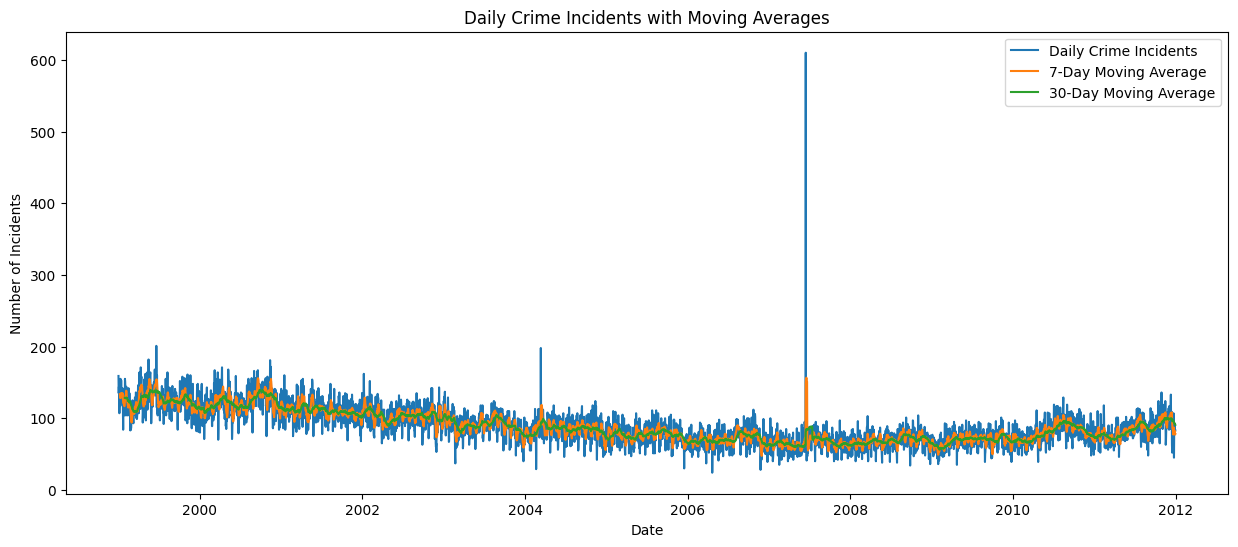

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(daily_incidents, label='Daily Crime Incidents')
plt.plot(daily_incidents_7d_ma, label='7-Day Moving Average')
plt.plot(daily_incidents_30d_ma, label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Daily Crime Incidents with Moving Averages')
plt.legend()
plt.show()

**Reasoning**:
Plot the seasonal component obtained from the STL decomposition to visualize the seasonal patterns in the data.



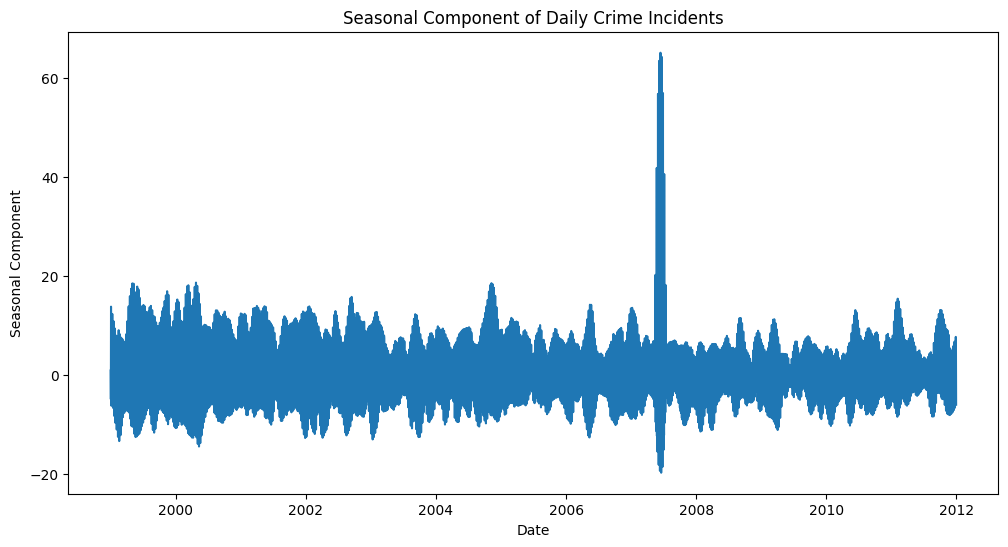

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(res.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of Daily Crime Incidents')
plt.show()

## Summary:

### 1. Q&A

No explicit questions were asked in the provided data analysis process. However, based on the analysis steps, we can infer that the overall goal was to understand the temporal patterns and characteristics of crime incidents in Vancouver.


### 2. Data Analysis Key Findings

* **Missing Values and Outliers:** The original dataset had missing values, primarily in the `HUNDRED_BLOCK` and `NEIGHBOURHOOD` columns, and outliers in 'X' and 'Longitude'. These were handled by removing rows with missing values and outliers.
* **Crime Type Distribution:** The most frequent crime type was 'Other Theft', followed by 'Break and Enter Residential/Other'.
* **Neighbourhood Distribution:**  The most crime-prone neighbourhoods were 'Downtown', 'West End', and 'Stanley Park'.
* **Time Series Trends:** The daily number of crime incidents showed a general trend with some seasonality, with a possible increase in incidents during the summer months.

### 3. Insights or Next Steps

* **Investigate Seasonal Patterns:** Explore the seasonal patterns in crime incidents further. Are there specific crime types that are more prevalent during certain seasons? This could help law enforcement allocate resources effectively.
* **Predictive Modeling:** Develop a time series forecasting model to predict future crime rates. This could involve using ARIMA or other suitable models based on the identified autocorrelation patterns.
